In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from datetime import timedelta

In [8]:
df = pd.read_csv("Nat_Gas.csv")
df['Dates'] = pd.to_datetime(df['Dates'], format = '%m/%d/%y')
df = df.sort_values('Dates')

In [10]:
#prepare Numaric Index for Spline

x = (df['Dates'] - df['Dates'].min()).dt.days.values
y = df['Prices'].values

In [11]:
spline = UnivariateSpline(x, y, s=0.5) 

In [17]:
last_date = df['Dates'].max()
future_dates = pd.date_range (last_date + timedelta(days = 1),
                             last_date + timedelta(days = 365), 
                              freq = 'D')
all_dates = pd.date_range(df['Dates'].min(), future_dates.max(), freq='D')
x_all = (all_dates - df['Dates'].min()).days.values


In [19]:
#linear trend for future 

trend_slope = (y[-1] - y[-6]) / (x[-1] - x[-6])
future_extension = spline(x_all)
future_extension[x_all > x[-1]] = y[-1] + trend_slope * (x_all[x_all > x[-1]] - x[-1])

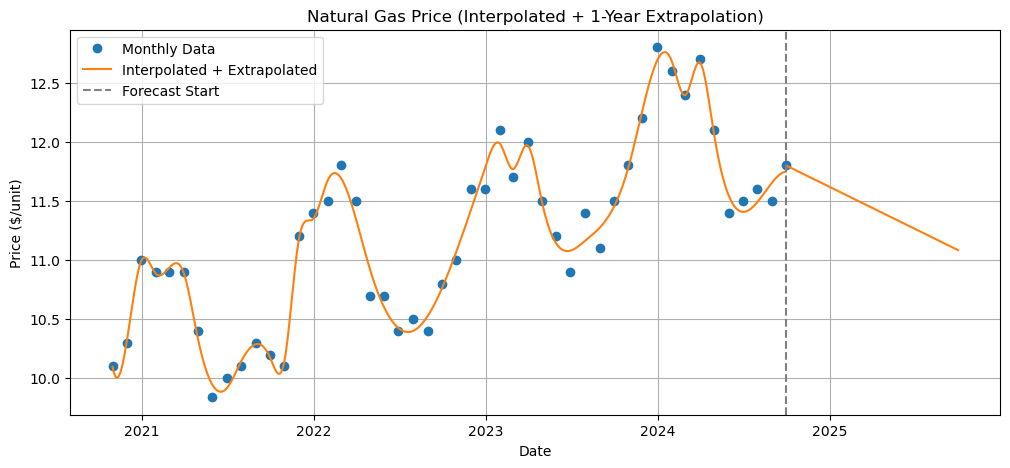

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df['Dates'], y, 'o', label='Monthly Data')
plt.plot(all_dates, future_extension, '-', label='Interpolated + Extrapolated')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Natural Gas Price (Interpolated + 1-Year Extrapolation)')
plt.xlabel('Date')
plt.ylabel('Price ($/unit)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def get_price(input_date):
    """
    Returns estimated natural gas price for any date.
    Accepts string or datetime.
    """
    if isinstance(input_date, str):
        input_date = pd.to_datetime(input_date)
    days_since_start = (input_date - df['Dates'].min()).days
    return float(spline(days_since_start)) if days_since_start <= x[-1] \
        else float(y[-1] + trend_slope * (days_since_start - x[-1]))

#Example usage
example_date = '2025-03-31'
print(f"Estimated price on {example_date}: ${get_price(example_date):.2f}")

Estimated price on 2025-03-31: $11.44
